In [2]:
#Import libraries and dependencies
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read in data file
csv_path = "Resources/aep_data.csv"
electric_usage_file = Path(csv_path)
print(csv_path)
print(electric_usage_file)
electric_usage_df = pd.read_csv(electric_usage_file)
electric_usage_df.head()

Resources/aep_data.csv
Resources\aep_data.csv


,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,NOTES
0,Electric usage,2023-05-01,00:00,00:14,0.26,$0.04,NaN
1,Electric usage,2023-05-01,00:15,00:29,0.26,$0.04,NaN
2,Electric usage,2023-05-01,00:30,00:44,0.19,$0.03,NaN
3,Electric usage,2023-05-01,00:45,00:59,0.12,$0.02,NaN
4,Electric usage,2023-05-01,01:00,01:14,0.15,$0.02,NaN


In [4]:
electric_usage_df.dtypes

TYPE            object
DATE            object
START TIME      object
END TIME        object
USAGE (kWh)    float64
COST            object
NOTES          float64
dtype: object

In [5]:
# Convert COST column to a float and then calculate the cost_per_kwh
electric_usage_df['COST'] = electric_usage_df['COST'].str.replace('$', '').astype(float)
electric_usage_df['cost_per_kwh'] = electric_usage_df['COST']/electric_usage_df['USAGE (kWh)']
electric_usage_df.head(25)

,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,NOTES,cost_per_kwh
0,Electric usage,2023-05-01,00:00,00:14,0.26,0.04,NaN,0.153846
1,Electric usage,2023-05-01,00:15,00:29,0.26,0.04,NaN,0.153846
2,Electric usage,2023-05-01,00:30,00:44,0.19,0.03,NaN,0.157895
3,Electric usage,2023-05-01,00:45,00:59,0.12,0.02,NaN,0.166667
4,Electric usage,2023-05-01,01:00,01:14,0.15,0.02,NaN,0.133333
5,Electric usage,2023-05-01,01:15,01:29,0.20,0.03,NaN,0.150000
6,Electric usage,2023-05-01,01:30,01:44,0.19,0.03,NaN,0.157895
7,Electric usage,2023-05-01,01:45,01:59,0.19,0.03,NaN,0.157895
8,Electric usage,2023-05-01,02:00,02:14,0.19,0.03,NaN,0.157895
9,Electric usage,2023-05-01,02:15,02:29,0.14,0.02,NaN,0.142857


In [6]:
electric_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35226 entries, 0 to 35225
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          35226 non-null  object 
 1   DATE          35226 non-null  object 
 2   START TIME    35226 non-null  object 
 3   END TIME      35226 non-null  object 
 4   USAGE (kWh)   35226 non-null  float64
 5   COST          35226 non-null  float64
 6   NOTES         0 non-null      float64
 7   cost_per_kwh  35226 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.2+ MB


In [7]:
electric_usage_df.columns

Index(['TYPE', 'DATE', 'START TIME', 'END TIME', 'USAGE (kWh)', 'COST',
       'NOTES', 'cost_per_kwh'],
      dtype='object')

In [8]:
electric_usage_df['date_time'] = electric_usage_df['DATE'] + ' ' + electric_usage_df['START TIME']
electric_usage_df['date_time'] = pd.to_datetime(electric_usage_df['date_time'])
electric_usage_df.head()

,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,NOTES,cost_per_kwh,date_time
0,Electric usage,2023-05-01,00:00,00:14,0.26,0.04,NaN,0.153846,2023-05-01 00:00:00
1,Electric usage,2023-05-01,00:15,00:29,0.26,0.04,NaN,0.153846,2023-05-01 00:15:00
2,Electric usage,2023-05-01,00:30,00:44,0.19,0.03,NaN,0.157895,2023-05-01 00:30:00
3,Electric usage,2023-05-01,00:45,00:59,0.12,0.02,NaN,0.166667,2023-05-01 00:45:00
4,Electric usage,2023-05-01,01:00,01:14,0.15,0.02,NaN,0.133333,2023-05-01 01:00:00


In [9]:
electric_usage_df = electric_usage_df[['TYPE', 'DATE', 'START TIME', 'END TIME', 'date_time', 'USAGE (kWh)', 'COST', 'cost_per_kwh']]
electric_usage_df.head(25)

,TYPE,DATE,START TIME,END TIME,date_time,USAGE (kWh),COST,cost_per_kwh
0,Electric usage,2023-05-01,00:00,00:14,2023-05-01 00:00:00,0.26,0.04,0.153846
1,Electric usage,2023-05-01,00:15,00:29,2023-05-01 00:15:00,0.26,0.04,0.153846
2,Electric usage,2023-05-01,00:30,00:44,2023-05-01 00:30:00,0.19,0.03,0.157895
3,Electric usage,2023-05-01,00:45,00:59,2023-05-01 00:45:00,0.12,0.02,0.166667
4,Electric usage,2023-05-01,01:00,01:14,2023-05-01 01:00:00,0.15,0.02,0.133333
5,Electric usage,2023-05-01,01:15,01:29,2023-05-01 01:15:00,0.20,0.03,0.150000
6,Electric usage,2023-05-01,01:30,01:44,2023-05-01 01:30:00,0.19,0.03,0.157895
7,Electric usage,2023-05-01,01:45,01:59,2023-05-01 01:45:00,0.19,0.03,0.157895
8,Electric usage,2023-05-01,02:00,02:14,2023-05-01 02:00:00,0.19,0.03,0.157895
9,Electric usage,2023-05-01,02:15,02:29,2023-05-01 02:15:00,0.14,0.02,0.142857


In [10]:
electric_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35226 entries, 0 to 35225
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TYPE          35226 non-null  object        
 1   DATE          35226 non-null  object        
 2   START TIME    35226 non-null  object        
 3   END TIME      35226 non-null  object        
 4   date_time     35226 non-null  datetime64[ns]
 5   USAGE (kWh)   35226 non-null  float64       
 6   COST          35226 non-null  float64       
 7   cost_per_kwh  35226 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.2+ MB


In [11]:
electric_usage_df.tail()

,TYPE,DATE,START TIME,END TIME,date_time,USAGE (kWh),COST,cost_per_kwh
35221,Electric usage,2024-05-01,22:45,22:59,2024-05-01 22:45:00,0.25,0.05,0.200000
35222,Electric usage,2024-05-01,23:00,23:14,2024-05-01 23:00:00,0.47,0.09,0.191489
35223,Electric usage,2024-05-01,23:15,23:29,2024-05-01 23:15:00,1.18,0.22,0.186441
35224,Electric usage,2024-05-01,23:30,23:44,2024-05-01 23:30:00,0.29,0.05,0.172414
35225,Electric usage,2024-05-01,23:45,23:59,2024-05-01 23:45:00,0.25,0.05,0.200000


In [12]:
electric_usage_df = electric_usage_df[electric_usage_df['DATE'] != '2024-05-01']    
electric_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35130 entries, 0 to 35129
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TYPE          35130 non-null  object        
 1   DATE          35130 non-null  object        
 2   START TIME    35130 non-null  object        
 3   END TIME      35130 non-null  object        
 4   date_time     35130 non-null  datetime64[ns]
 5   USAGE (kWh)   35130 non-null  float64       
 6   COST          35130 non-null  float64       
 7   cost_per_kwh  35130 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 2.4+ MB


In [13]:
electric_usage_df.tail()

,TYPE,DATE,START TIME,END TIME,date_time,USAGE (kWh),COST,cost_per_kwh
35125,Electric usage,2024-04-30,22:45,22:59,2024-04-30 22:45:00,0.34,0.07,0.205882
35126,Electric usage,2024-04-30,23:00,23:14,2024-04-30 23:00:00,0.49,0.09,0.183673
35127,Electric usage,2024-04-30,23:15,23:29,2024-04-30 23:15:00,1.32,0.25,0.189394
35128,Electric usage,2024-04-30,23:30,23:44,2024-04-30 23:30:00,0.24,0.05,0.208333
35129,Electric usage,2024-04-30,23:45,23:59,2024-04-30 23:45:00,0.25,0.05,0.200000


In [14]:
electric_usage_df.set_index('date_time', inplace=True)

electric_usage_df.head()

,TYPE,DATE,START TIME,END TIME,USAGE (kWh),COST,cost_per_kwh
date_time,,,,,,,
2023-05-01 00:00:00,Electric usage,2023-05-01,00:00,00:14,0.26,0.04,0.153846
2023-05-01 00:15:00,Electric usage,2023-05-01,00:15,00:29,0.26,0.04,0.153846
2023-05-01 00:30:00,Electric usage,2023-05-01,00:30,00:44,0.19,0.03,0.157895
2023-05-01 00:45:00,Electric usage,2023-05-01,00:45,00:59,0.12,0.02,0.166667
2023-05-01 01:00:00,Electric usage,2023-05-01,01:00,01:14,0.15,0.02,0.133333


<Axes: xlabel='date_time'>

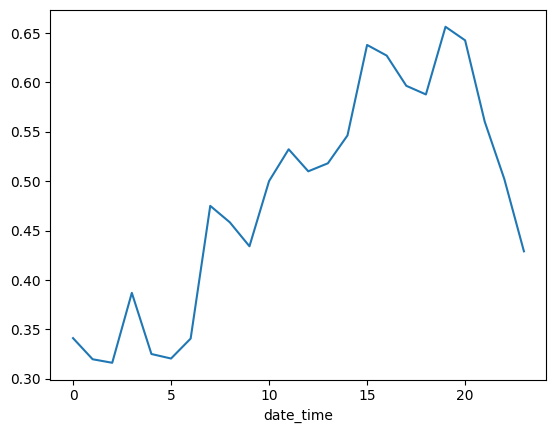

In [15]:
electric_usage_df['USAGE (kWh)'].groupby(electric_usage_df.index.hour).mean().plot()


<Axes: xlabel='date_time'>

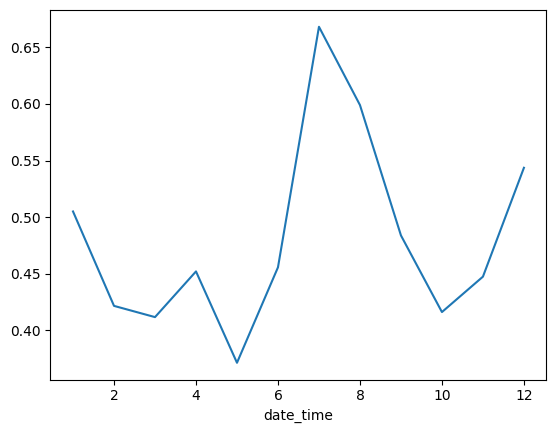

In [16]:
electric_usage_df['USAGE (kWh)'].groupby(electric_usage_df.index.month).mean().plot()

<Axes: xlabel='date_time'>

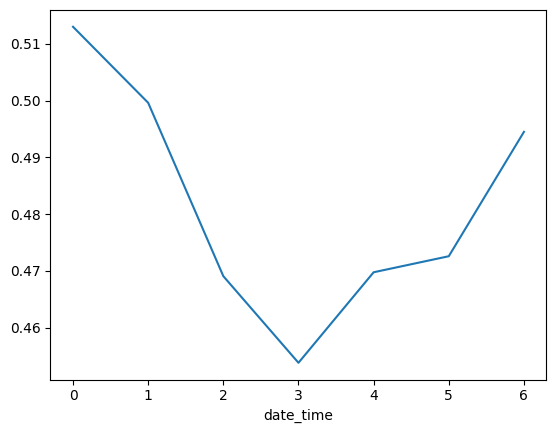

In [17]:
electric_usage_df['USAGE (kWh)'].groupby(electric_usage_df.index.dayofweek).mean().plot()

<Axes: xlabel='week'>

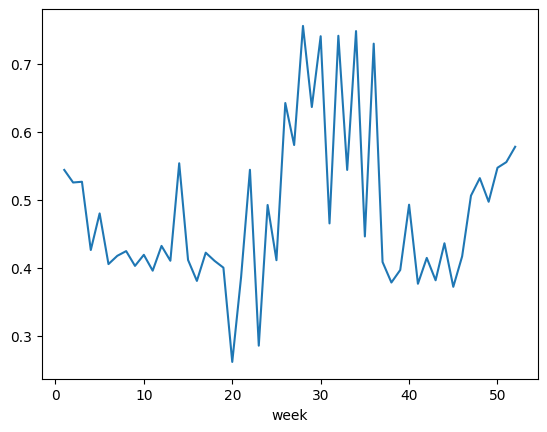

In [18]:
electric_usage_df['USAGE (kWh)'].groupby(electric_usage_df.index.isocalendar().week).mean().plot()

In [19]:
resample_columns_list = ['USAGE (kWh)', 'COST']
electric_usage_daily_df = electric_usage_df[resample_columns_list].resample('D').sum()
electric_usage_hourly_df = electric_usage_df[resample_columns_list].resample('h').sum()
electric_usage_monthly_df = electric_usage_df[resample_columns_list].resample('M').sum()
electric_usage_monthly_df.head(30)

,USAGE (kWh),COST
date_time,,
2023-05-31,1105.31,156.36
2023-06-30,1312.45,186.63
2023-07-31,1988.30,280.31
2023-08-31,1782.58,333.38
2023-09-30,1393.51,260.97
2023-10-31,1238.61,231.97
2023-11-30,1288.24,241.00
2023-12-31,1617.78,302.87
2024-01-31,1502.94,286.42


<Axes: xlabel='date_time'>

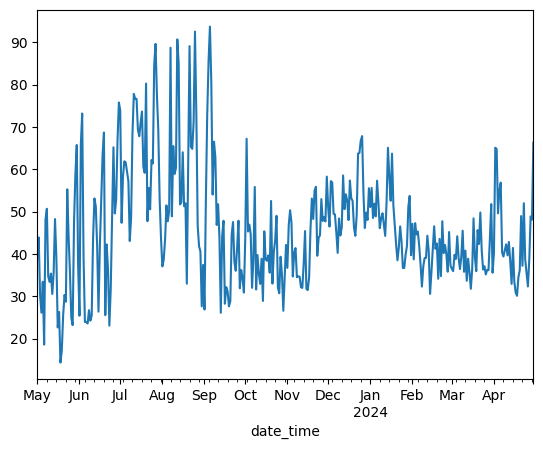

In [20]:
electric_usage_daily_df['USAGE (kWh)'].plot()

In [21]:

max_usage_day = electric_usage_daily_df['USAGE (kWh)'].idxmax()
max_usage = electric_usage_daily_df['USAGE (kWh)'].max()
min_usage_day = electric_usage_daily_df['USAGE (kWh)'].idxmin()
min_usage = electric_usage_daily_df['USAGE (kWh)'].min()
print(f'Day with least usage: {min_usage_day} Usage: {min_usage} kWh \nDay with most usage: {max_usage_day} Usage: {max_usage} kWh')

Day with least usage: 2023-05-18 00:00:00 Usage: 14.36 kWh 
Day with most usage: 2023-09-05 00:00:00 Usage: 93.73 kWh


In [22]:

electric_usage_daily_df.describe()

,USAGE (kWh),COST
count,366.000000,366.000000
mean,46.253798,8.154044
std,13.967721,2.470564
min,14.360000,2.100000
25%,36.450000,6.732500
50%,44.295000,8.015000
75%,52.552500,9.450000
max,93.730000,17.510000


<Axes: xlabel='date_time'>

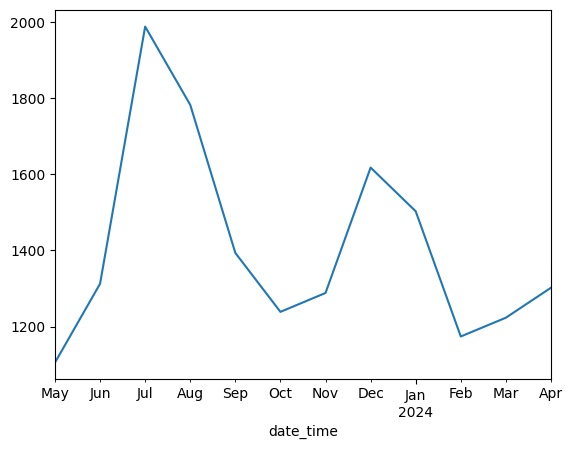

In [23]:
electric_usage_monthly_df['USAGE (kWh)'].plot()

<Axes: xlabel='date_time'>

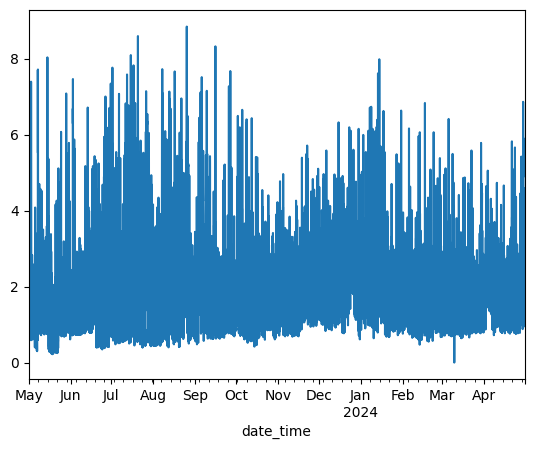

In [24]:
electric_usage_hourly_df['USAGE (kWh)'].plot()

<Axes: xlabel='date_time'>

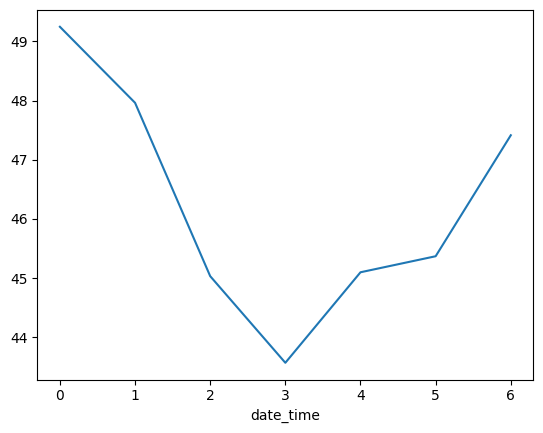

In [25]:
electric_usage_daily_df['USAGE (kWh)'].groupby(electric_usage_daily_df.index.dayofweek).mean().plot()

In [41]:
# Garage Fridge kw/h calc
total_kwh = 3.64
total_time = '78:46'
hours, minutes = map(float, total_time.split(':'))
total_time = hours + (minutes/60)


kWh_per_hr = total_kwh/total_time
kWh_per_day = total_kwh/(total_time/24)
double_check = kWh_per_hr*24

kWh_per_month = kWh_per_day * 365 / 12
print(kWh_per_month)

33.73508252221752


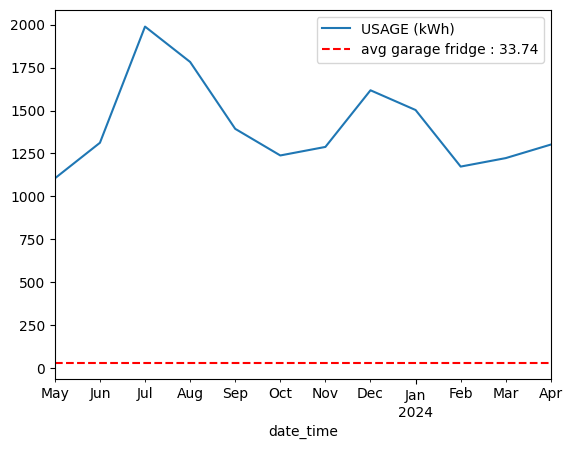

In [45]:
ax = electric_usage_monthly_df['USAGE (kWh)'].plot()
ax.axhline(y=kWh_per_month, color='r', linestyle='--', label=f'avg garage fridge : {kWh_per_month:.2f}')
ax.legend()